## LSPR response calculation

We study the relation between the LSPR response and the sensor-analyte distance. We vary the distance between the silver sphere (sensor) and the analytes (small spheres i.e. proteins) and we calculate the cross extinction section as a function of wavelength for the different distances:

* $d = \infty$ i.e. we only have the sensor (silver sphere r=10)
* $d=4 \,nm$
* $d=2 \,nm$
* $d=1 \,nm$

In [1]:
import numpy
from matplotlib import pyplot, rcParams
from scripts.data_analysis_helper import plot_cext_wave_distance
%matplotlib inline

In [2]:
w , Cext = numpy.loadtxt('../data/wave_cext_d/wave_cext_d_infty_silver.txt', 
                               unpack = True)
w_d1 , Cext_d1 = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=1.txt', 
                               unpack = True)
w_d2 , Cext_d2 = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=2.txt', 
                               unpack = True)
w_d4 , Cext_d4 = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=4.txt', 
                               unpack = True)


In [3]:
wavelength = [w, w_d4, w_d2, w_d1]
cext = [Cext, Cext_d4, Cext_d2, Cext_d1]
linestyles = ['-', '--', '-.', ':']
colors = ['k', '0.2', '0.4', '0.6']
labels = ['$d = \infty$','$d=4 \,nm$', '$d=2 \,nm$', '$d=1 \,nm$']

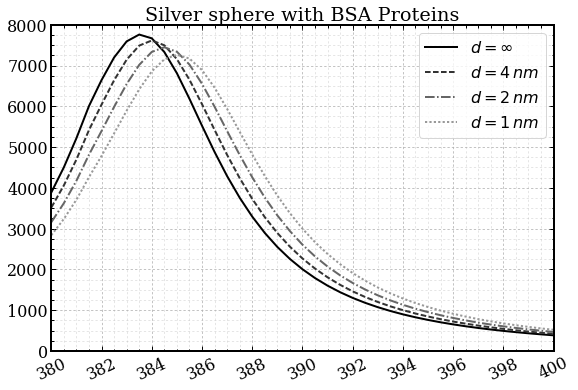

In [4]:
plot_cext_wave_distance(wavelength, cext, linestyles, colors, labels)

In [5]:
lab = ['d=infty','d=4 nm', 'd=2 nm', 'd=1 nm']
lst = list(zip(cext, lab))
for i in range(len(lst)):
    c, l = lst[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w[idx][0]))

Cext max at d=infty is 7759.32132085 and it occurs at a wavelngth of 383.5
Cext max at d=4 nm is 7613.71190957 and it occurs at a wavelngth of 384.0
Cext max at d=2 nm is 7447.18207387 and it occurs at a wavelngth of 384.5
Cext max at d=1 nm is 7263.87259063 and it occurs at a wavelngth of 385.0


We can see in the figure that the distance between the sensor and the analyte affects sensitivity. As the distances decrease, the largest the shift. In this case particularly we can se that as the distance doubles the shift drops by a constant ammount of 0.5 nm. 

## Removing the spheres in the x-axis

In [6]:
w_d1_x , Cext_d1_x = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=1-x.txt', 
                               unpack = True)
w_d2_x , Cext_d2_x = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=2-x.txt', 
                               unpack = True)
w_d4_x , Cext_d4_x = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=4-x.txt', 
                               unpack = True)

In [7]:
wavelength_x = [w, w_d4_x, w_d2_x, w_d1_x]
cext_x = [Cext, Cext_d4_x, Cext_d2_x, Cext_d1_x]

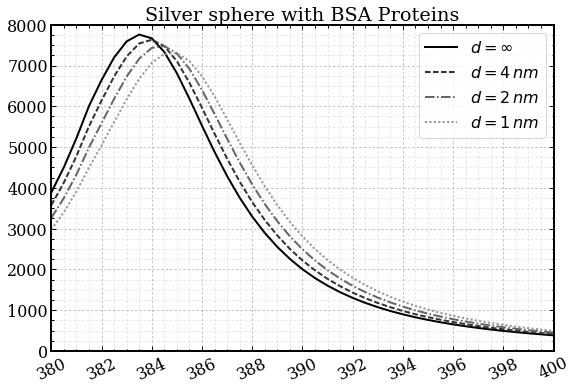

In [8]:
plot_cext_wave_distance(wavelength_x, cext_x, linestyles, colors, labels)

In [9]:
lab = ['d=infty','d=4 nm', 'd=2 nm', 'd=1 nm']
lst_x = list(zip(cext_x, lab))
for i in range(len(lst_x)):
    c, l = lst_x[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w[idx][0]))

Cext max at d=infty is 7759.32132085 and it occurs at a wavelngth of 383.5
Cext max at d=4 nm is 7631.17360943 and it occurs at a wavelngth of 384.0
Cext max at d=2 nm is 7476.88266442 and it occurs at a wavelngth of 384.5
Cext max at d=1 nm is 7301.16999673 and it occurs at a wavelngth of 385.0


In [10]:
w_g , Cext_g = numpy.loadtxt('../data/wave_cext_d/wave_cext_d_infty_gold.txt', 
                               unpack = True)
w_d1_g , Cext_d1_g = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=1gold.txt', 
                               unpack = True)
w_d2_g , Cext_d2_g = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=2gold.txt', 
                               unpack = True)
w_d4_g , Cext_d4_g = numpy.loadtxt('../data/wave_cext_d/multiple_sphere_d=4gold.txt', 
                               unpack = True)



In [11]:
wavelength = [w_g, w_d4_g, w_d2_g, w_d1_g]
cext = [Cext_g, Cext_d4_g, Cext_d2_g, Cext_d1_g]
linestyles = ['-','--' ,'-.', ':']
colors = ['k','0.2','0.4', '0.6']
labels = ['$d = \infty$', '$d=4 \,nm$','$d=2 \,nm$', '$d=1 \,nm$']

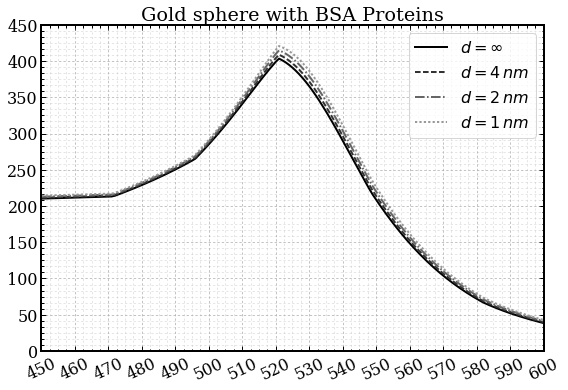

In [12]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['axes.linewidth'] = 2

fig=pyplot.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)

major_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 16)
minor_xticks = numpy.linspace(min(wavelength[0]), max(wavelength[0]), 61)
major_yticks = numpy.linspace(0, 450, 10)
minor_yticks = numpy.linspace(0, 450, 55)

ax.set_xticks(major_xticks)                                                       
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)

pyplot.xticks(rotation=25)
pyplot.tick_params(axis='both', length=5, width=1, which='major', direction='in')
pyplot.tick_params(axis='both', length=2.5, width=1, which='minor', direction='in')

pyplot.xlim(450,600)
pyplot.ylim(0,450)
pyplot.grid(ls=':', which='minor', alpha=0.4)
pyplot.grid(ls=':', which='major', alpha=0.8)
pyplot.title('Gold sphere with BSA Proteins')

for i in range(len(wavelength)):
    pyplot.plot(wavelength[i], cext[i], linestyle=linestyles[i], 
               color=colors[i], linewidth=2, label=labels[i])

pyplot.legend(loc='best')
pyplot.savefig('figures/Cext_wave_distance_gold.pdf', dpi=80, format='pdf');


In [13]:
lab = ['d=infty','d=4 nm', 'd=2 nm', 'd=1 nm']
lst_g = list(zip(cext, lab))
for i in range(len(lst_g)):
    c, l = lst_g[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_g[idx][0]))

Cext max at d=infty is 403.32347412 and it occurs at a wavelngth of 521.0
Cext max at d=4 nm is 408.68599907 and it occurs at a wavelngth of 521.0
Cext max at d=2 nm is 414.71123547 and it occurs at a wavelngth of 521.0
Cext max at d=1 nm is 420.72750327 and it occurs at a wavelngth of 521.0


In [14]:
w_g_h , Cext_g_h = numpy.loadtxt('../data/wave_cext_d/zoom_gold/wave_cext_d_infty_g_h.txt', 
                               unpack = True)
w_d1_g_h , Cext_d1_g_h = numpy.loadtxt('../data/wave_cext_d/zoom_gold/multiple_sphere_d=1_g_h.txt', 
                               unpack = True)
w_d2_g_h , Cext_d2_g_h = numpy.loadtxt('../data/wave_cext_d/zoom_gold/multiple_sphere_d=2_g_h.txt', 
                               unpack = True)
w_d4_g_h , Cext_d4_g_h = numpy.loadtxt('../data/wave_cext_d/zoom_gold/multiple_sphere_d=4_g_h.txt', 
                               unpack = True)

In [15]:
wavelength = [w_g_h, w_d4_g_h, w_d2_g_h, w_d1_g_h]
cext = [Cext_g_h, Cext_d4_g_h, Cext_d2_g_h, Cext_d1_g_h]

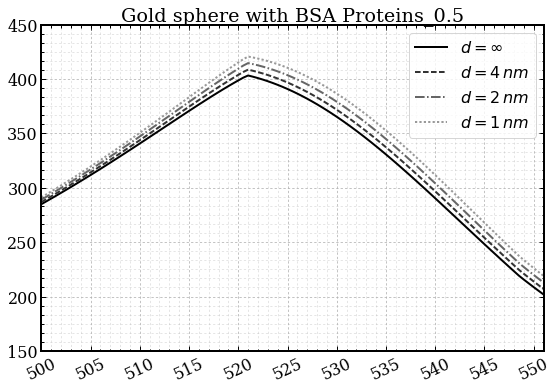

In [19]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['axes.linewidth'] = 2

fig=pyplot.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)

major_xticks = numpy.arange(min(wavelength[0]), max(wavelength[0]), 5)
minor_xticks = numpy.arange(min(wavelength[0]), max(wavelength[0]), 1)
major_yticks = numpy.linspace(0, 450, 10)
minor_yticks = numpy.linspace(0, 450, 55)

ax.set_xticks(major_xticks)                                                       
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)

pyplot.xticks(rotation=25)
pyplot.tick_params(axis='both', length=5, width=1, which='major', direction='in')
pyplot.tick_params(axis='both', length=2.5, width=1, which='minor', direction='in')

pyplot.xlim(500,551)
pyplot.ylim(150,450)
pyplot.grid(ls=':', which='minor', alpha=0.4)
pyplot.grid(ls=':', which='major', alpha=0.8)
pyplot.title('Gold sphere with BSA Proteins_0.5')

for i in range(len(wavelength)):
    pyplot.plot(wavelength[i], cext[i], linestyle=linestyles[i], 
               color=colors[i], linewidth=2, label=labels[i])

pyplot.legend(loc='best')
pyplot.savefig('figures/Cext_wave_distance_gold_0.5.pdf', dpi=80, format='pdf');


In [18]:
lab = ['d=infty','d=4 nm', 'd=2 nm', 'd=1 nm']
lst_g_h = list(zip(cext, lab))
for i in range(len(lst_g_h)):
    c, l = lst_g_h[i]
    idx = numpy.where(c==max(c))
    print('Cext max at {} is {} and it occurs at a wavelngth of {}'.format(l,max(c), w_g_h[idx][0]))

Cext max at d=infty is 403.32347412 and it occurs at a wavelngth of 521.0
Cext max at d=4 nm is 408.68599907 and it occurs at a wavelngth of 521.0
Cext max at d=2 nm is 414.71123547 and it occurs at a wavelngth of 521.0
Cext max at d=1 nm is 420.72750327 and it occurs at a wavelngth of 521.0
